In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
from calendar import calendar, monthrange

from streamflow_generation import multi_site_nile_generator, read_historical_series
from IPython.display import clear_output
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Let's generate a streamflow plotter function which help us either visually inspect either i) multiple time-series on the same graph or ii) a particular observation's position in relation to other points.

In [2]:
def streamflow_plotter(input_dfs, emphasis_index=None, unit=None):
    # Takes input df which has one column (named Date -> datetime object type)
    # and the second column is the streamflow values
    
    fig, ax = plt.subplots(figsize=(16,8))
    list_size = len(input_dfs)
    if list_size > 1:
        ax.set_title(f"Comparison of {list_size} streamflows")
    
    for input_df in input_dfs:
        
        streamflows = input_df.iloc[:,-1]
        name = streamflows.name
        if unit is None:
            unit = ([word for word in name.split() if word[-1] == ")"][-1])[:-1]

        ax.plot(input_df.Date, streamflows, label=name[:25])
        
        ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
        )
            
        legend_elements = None

        ax.set_ylabel(unit)
        ax.set_xlabel("Date")
        if len(input_dfs) == 1:
            ax.set_title(name)
        
    dates = input_df.Date
    size = len(dates)
#     if size < 10:
#         ax.set_xticks(dates)
#     else:
#         coarse_dates = [date for i, date in enumerate(dates) if i%(int(size/10)) == 0]
#         ax.set_xticks(coarse_dates)
        
    if emphasis_index is not None:
        circle_x = input_df.loc[emphasis_index, "Date"]
        circle_y = input_df.loc[emphasis_index, name]
        ax.plot(circle_x, circle_y, "ro", fillstyle=None)

        # Mean of the non-negative points:
        nonnegatives = [flow for flow in streamflows if flow >= 0]
        average = np.mean(nonnegatives)

        ax.axhline(average, color="red")

        legend_elements = [
            Line2D([0],[0],color='red', lw=2, label='Average of non-negative flows'),
            Line2D([0],[0],color='white', marker='o', markerfacecolor="red", label='Anomaly observation'),
        ]
        
    if legend_elements is not None:
        ax.legend(handles=legend_elements, loc='best')
    else:
        ax.legend()
        
    plt.xticks(rotation=90)
    plt.show()

I should do bunch of standardized actions/test on each time-series (the last column):

- Cast them to float **DONE**
- Detect negatives and fix **DONE**
- Detect how many NaNs and zeros **DONE**
- Fill in NaNs **DONE**
- Plot their bare version **DONE**
- Do monthly aggregation and then plot **DONE**
- Apply the SSI6 index and then plot **DONE**
- Plot comparable ones on the same graph (with the date dimension preserved) **DONE**

-----
White Nile at Mogren (Khartoum) (ten-daily discharge originally in MM3|day).csv
-----
|      | Date                |   White Nile at Mogren (Khartoum) (ten-daily discharge originally in MM3|day) |
|-----:|:--------------------|------------------------------------------------------------------------------:|
|  103 | 1914-07-21 00:00:00 |                                                                     -1.16e+07 |
|  679 | 1930-07-21 00:00:00 |                                                                -300000        |
|  680 | 1930-08-01 00:00:00 |                                                                     -6.2e+06  |
|  861 | 1935-08-11 00:00:00 |                                                                     -7.1e+06  |
| 1040 | 1940-08-01 00:00:00 |                                                                     -1.02e+07 |
| 1041 | 1940-08-11 00:00:00 |                                                                     -1.49e+07 |
| 1075 | 1941-07-21 

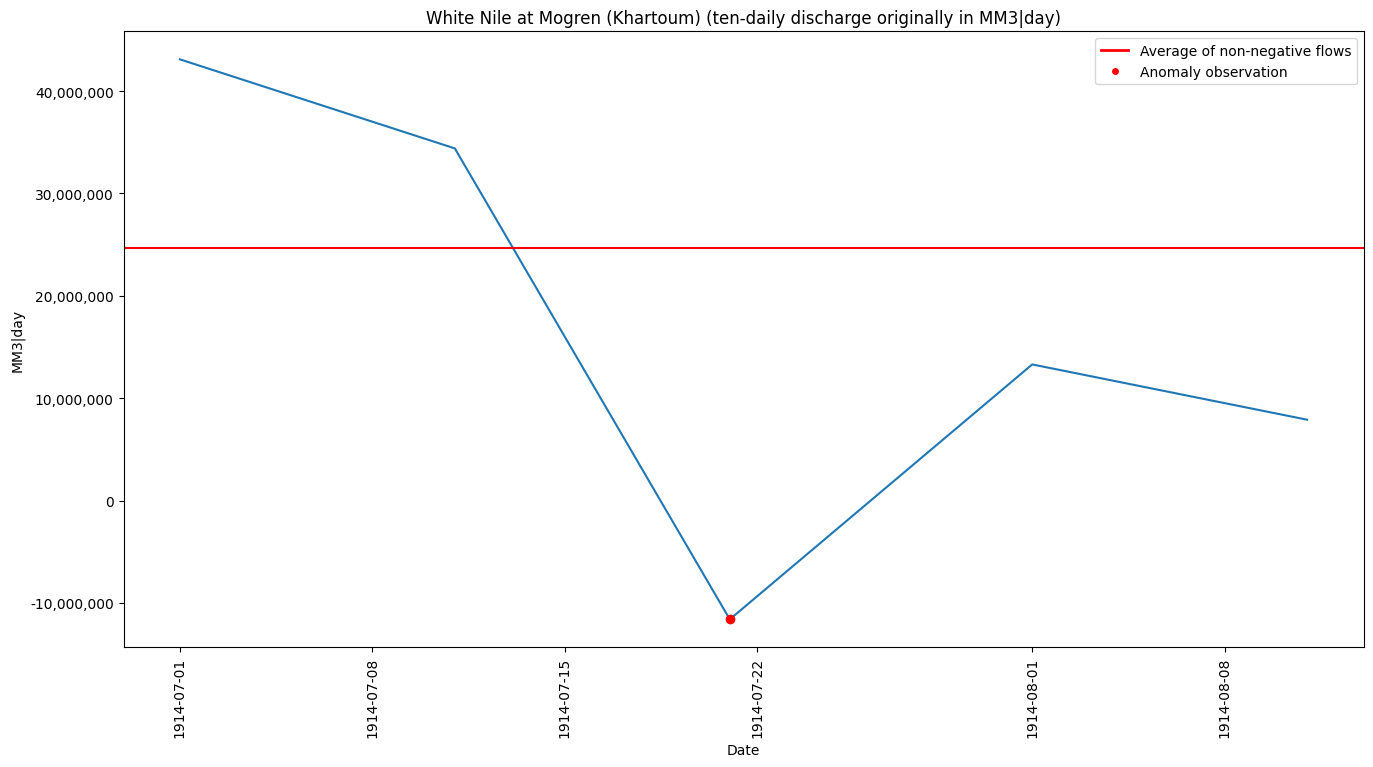

Plotting the observations of the same day as the anomaly:



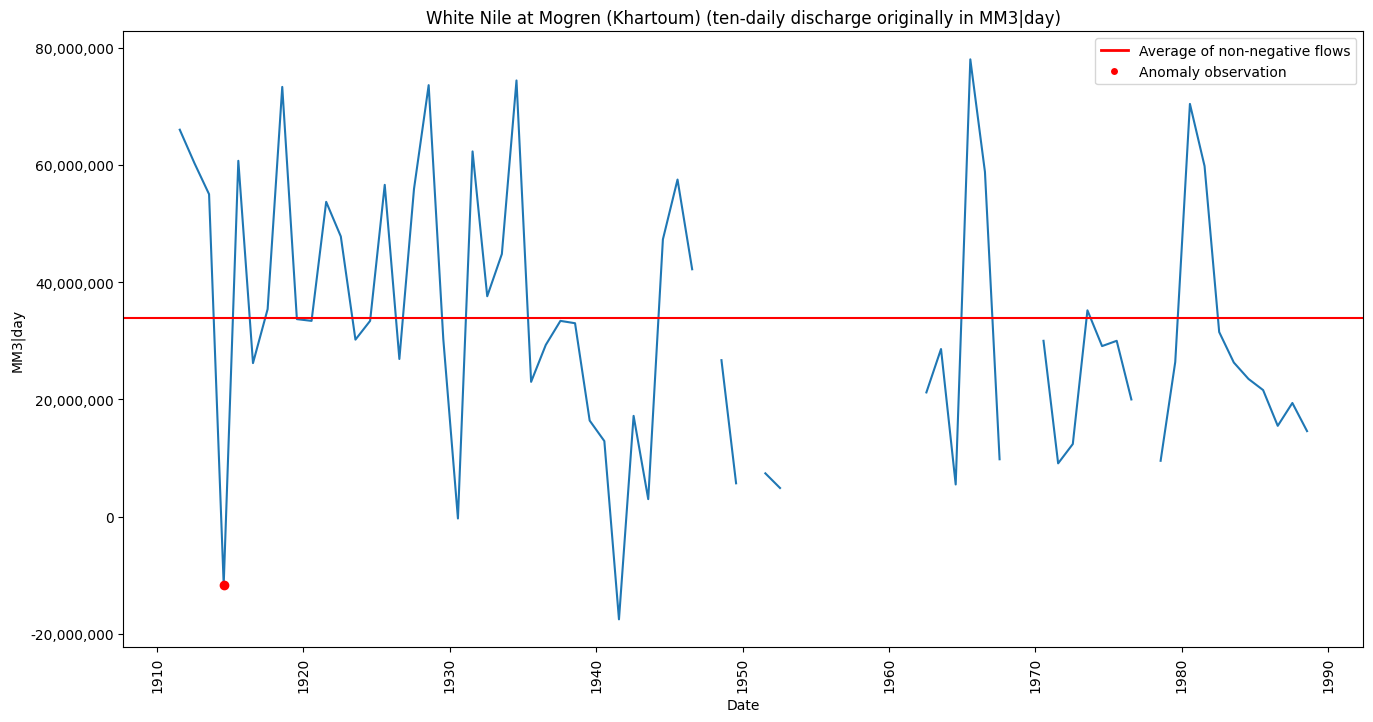

Plotting the two observations latest and immediately after the anomaly:



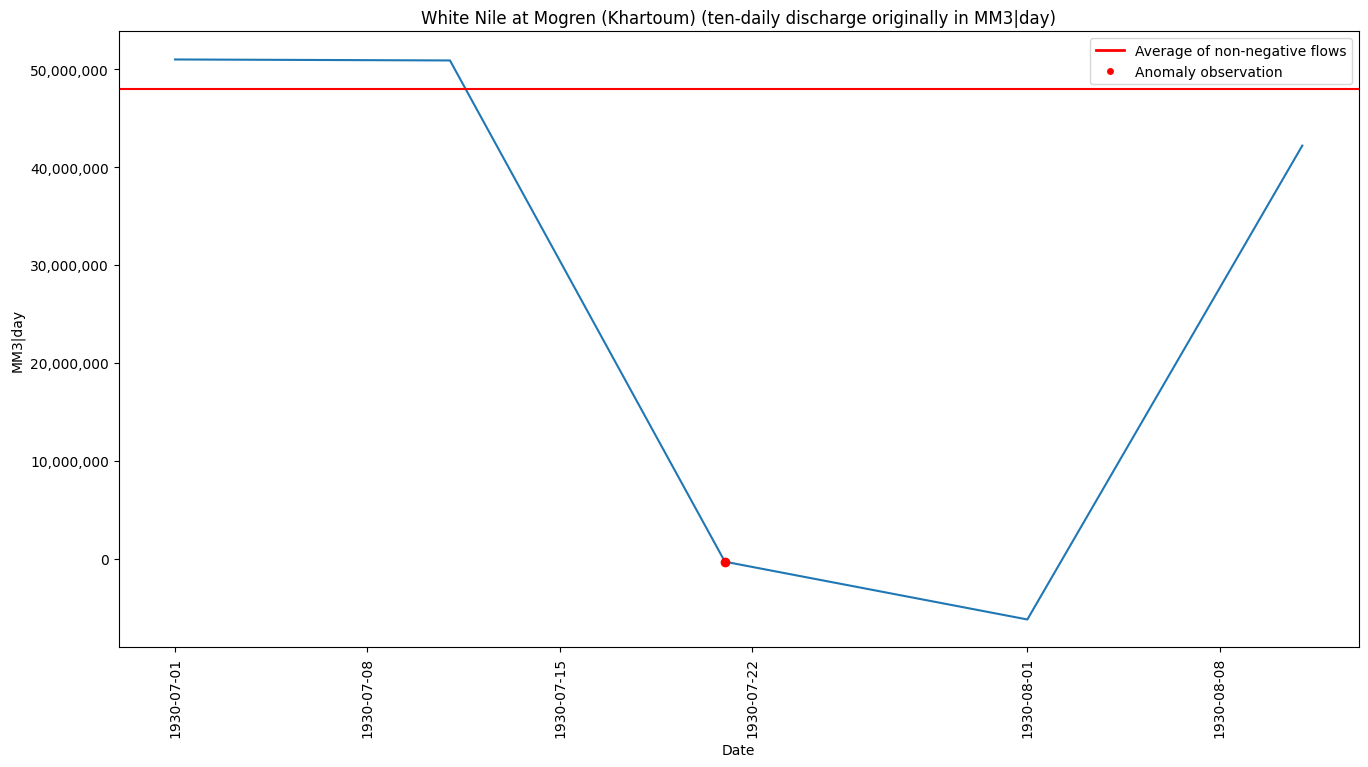

Plotting the observations of the same day as the anomaly:



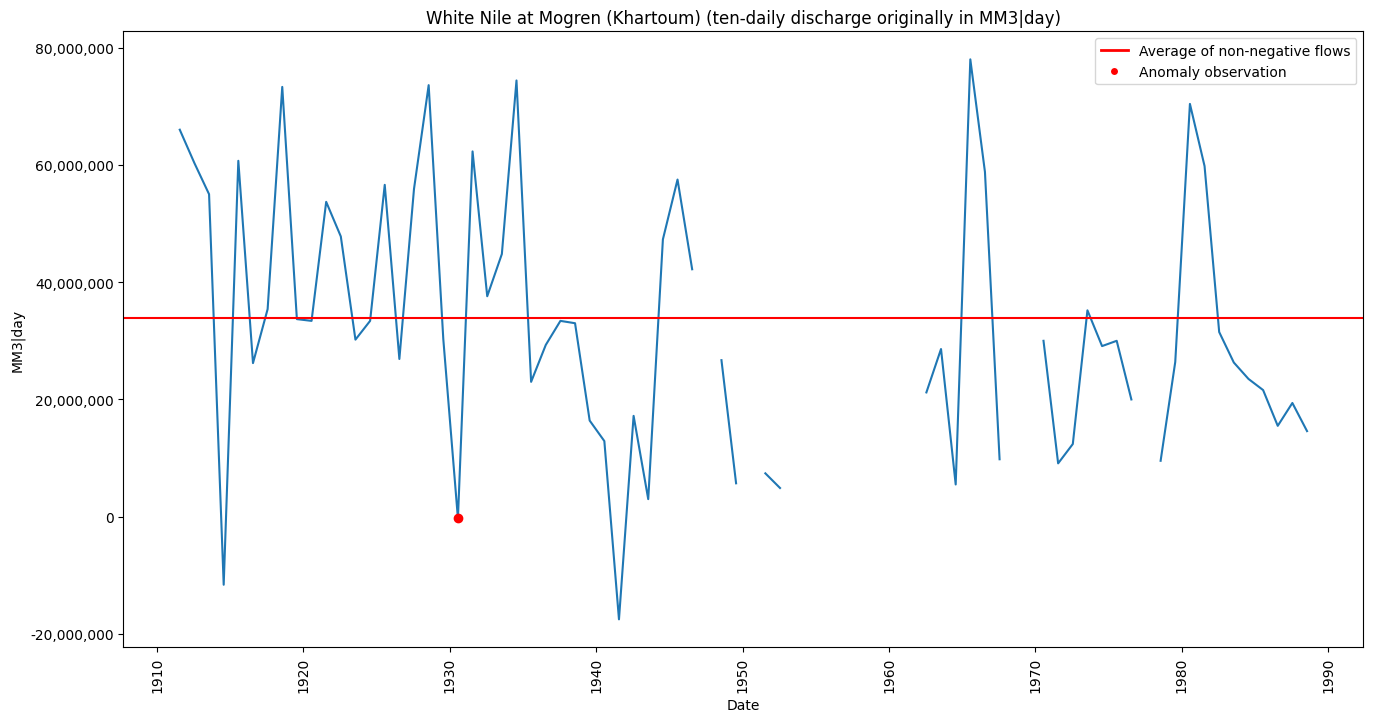

Plotting the two observations latest and immediately after the anomaly:



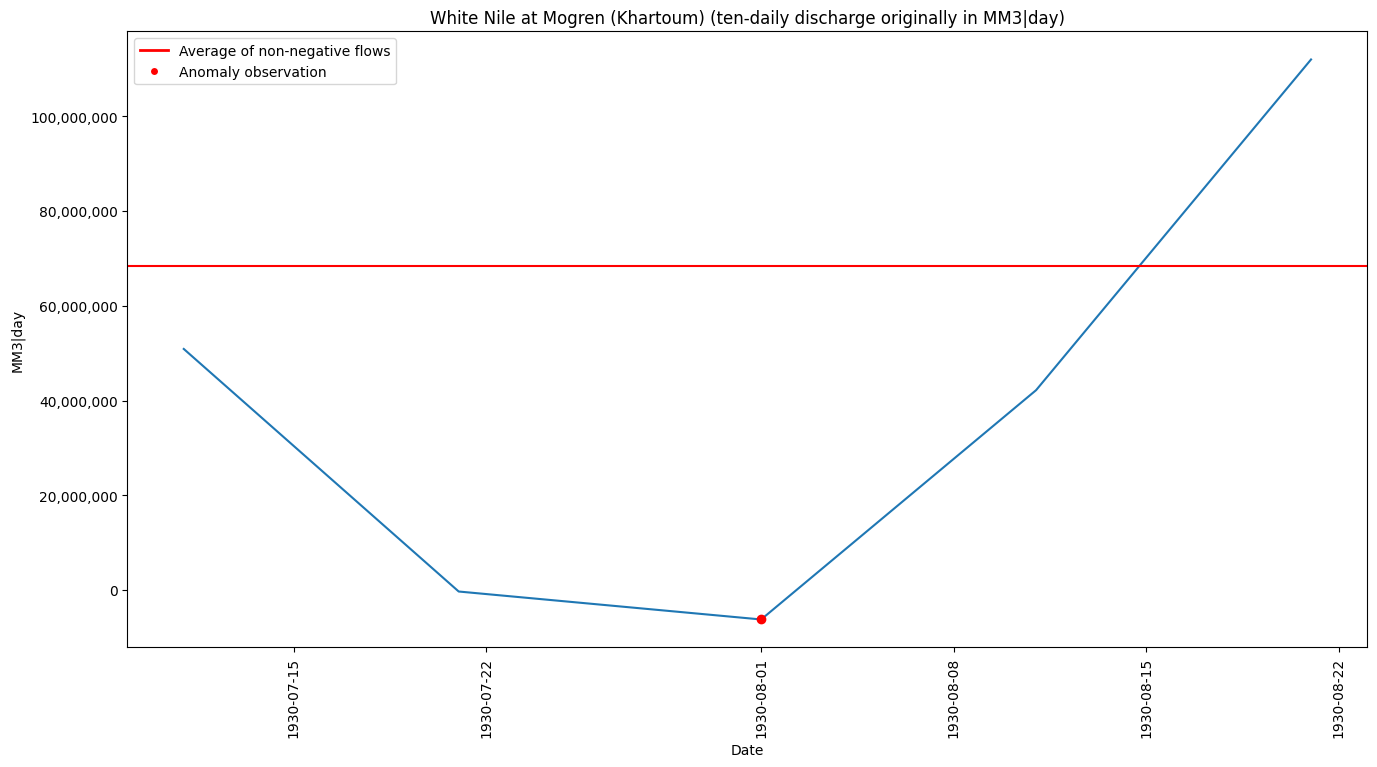

Plotting the observations of the same day as the anomaly:



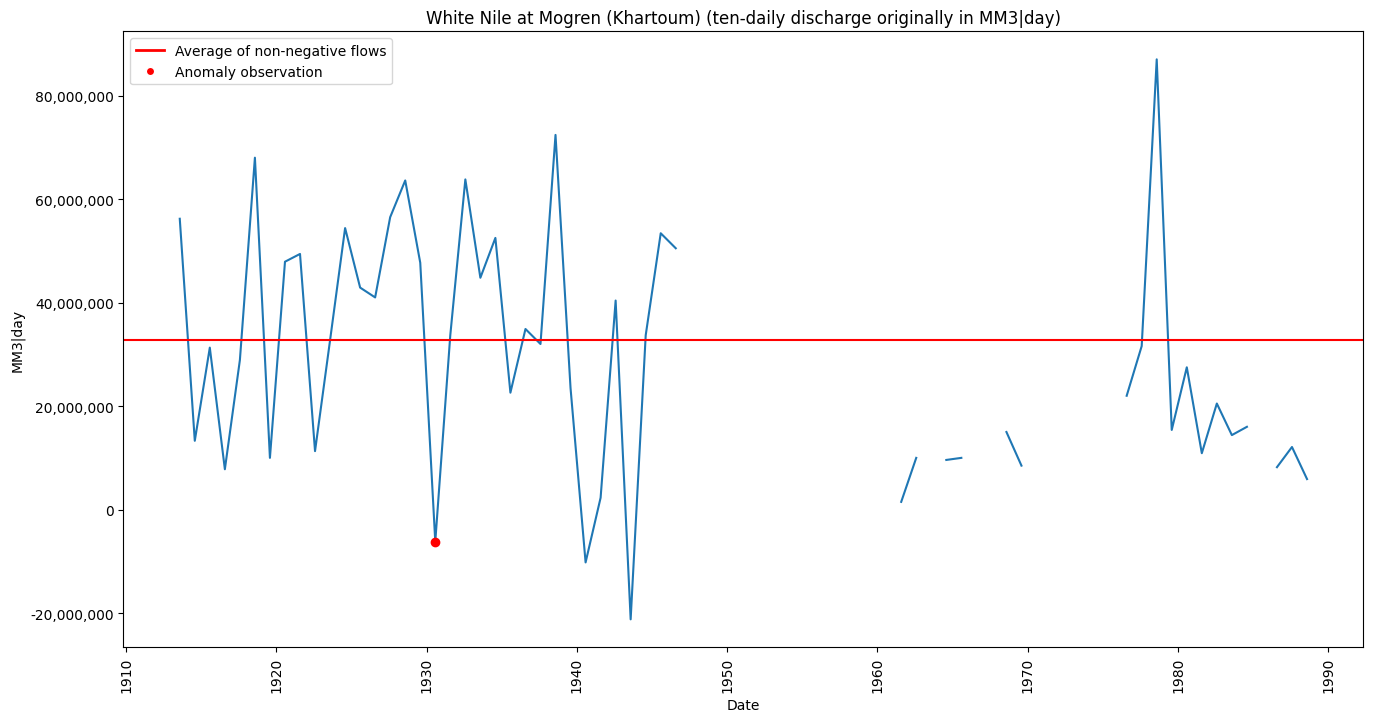

Plotting the two observations latest and immediately after the anomaly:



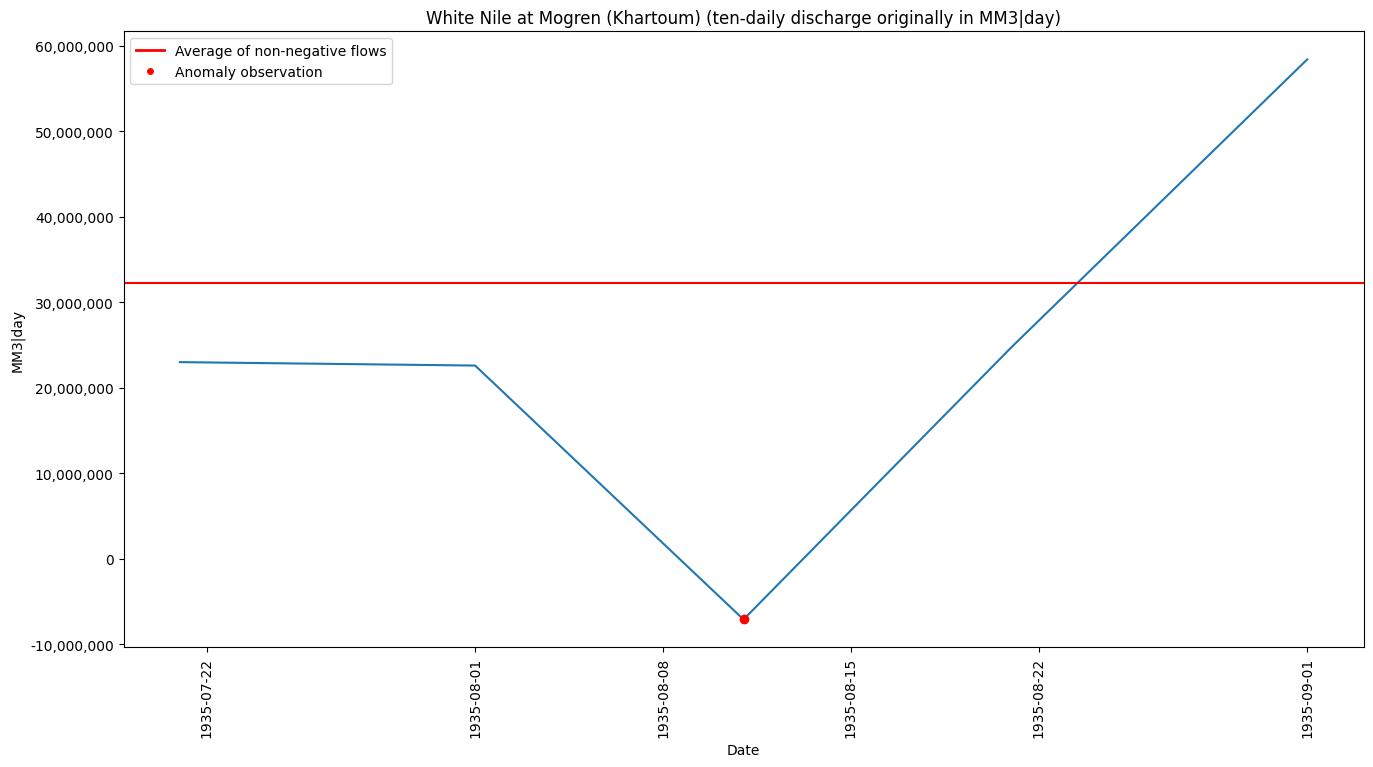

Plotting the observations of the same day as the anomaly:



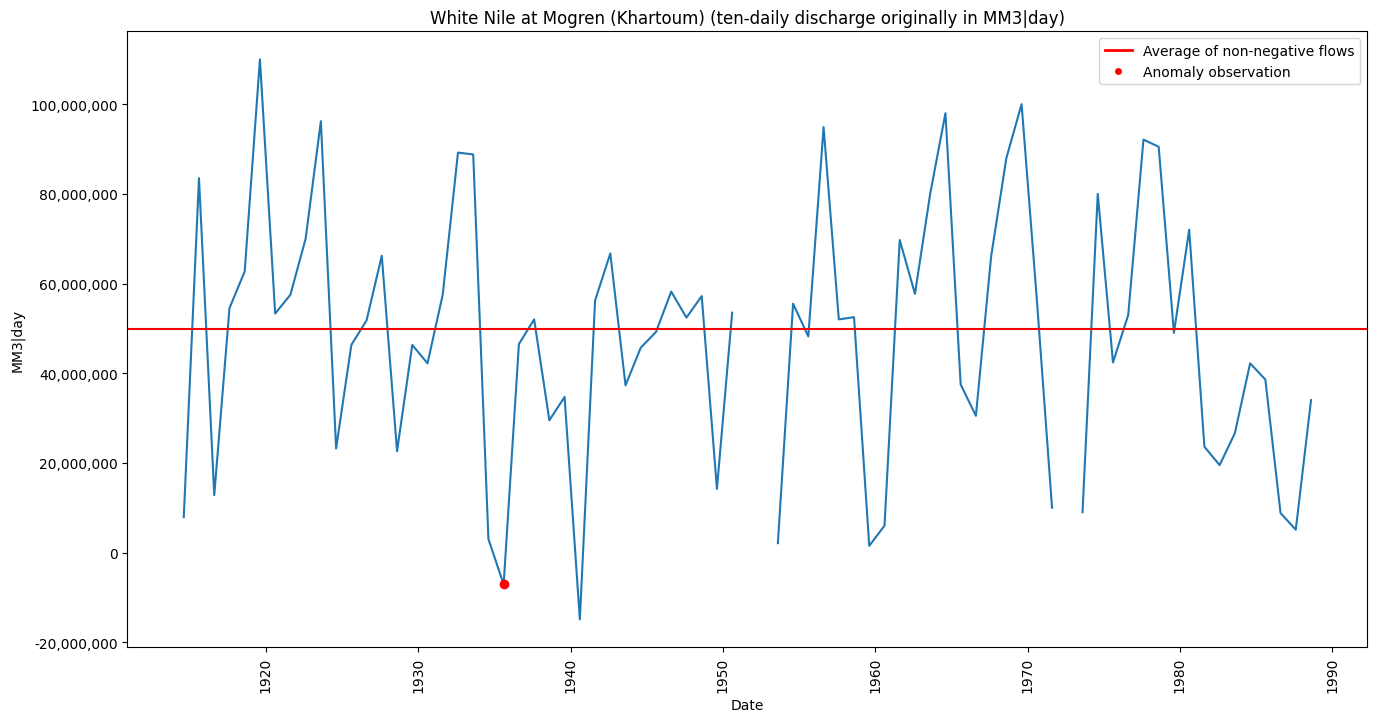

Plotting the two observations latest and immediately after the anomaly:



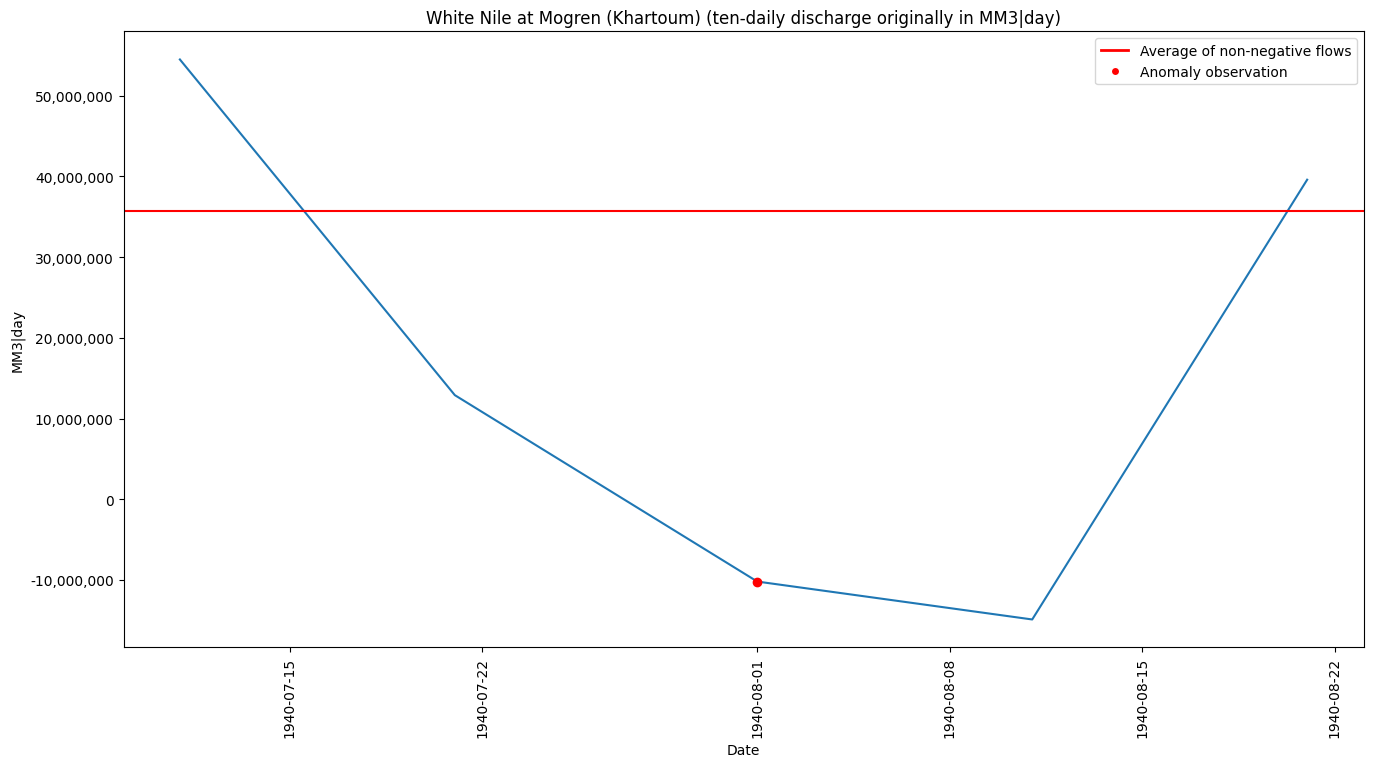

Plotting the observations of the same day as the anomaly:



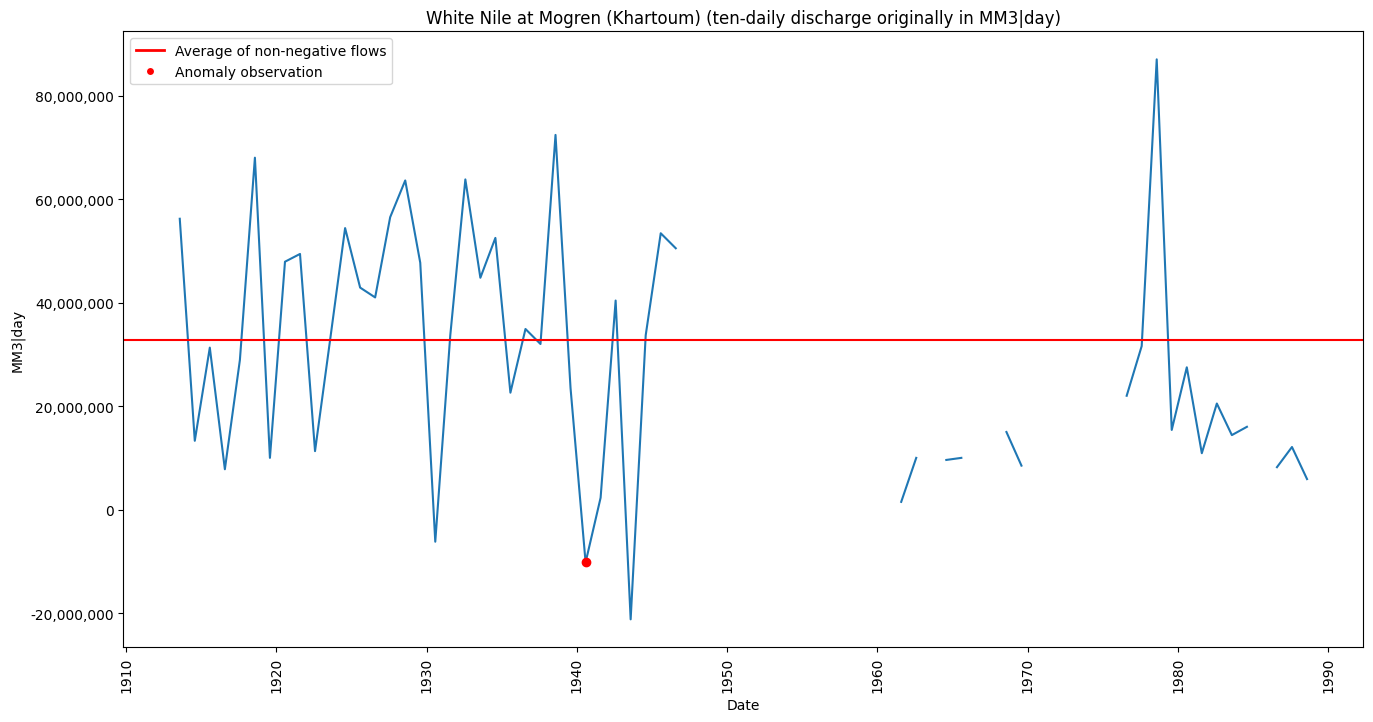

Plotting the two observations latest and immediately after the anomaly:



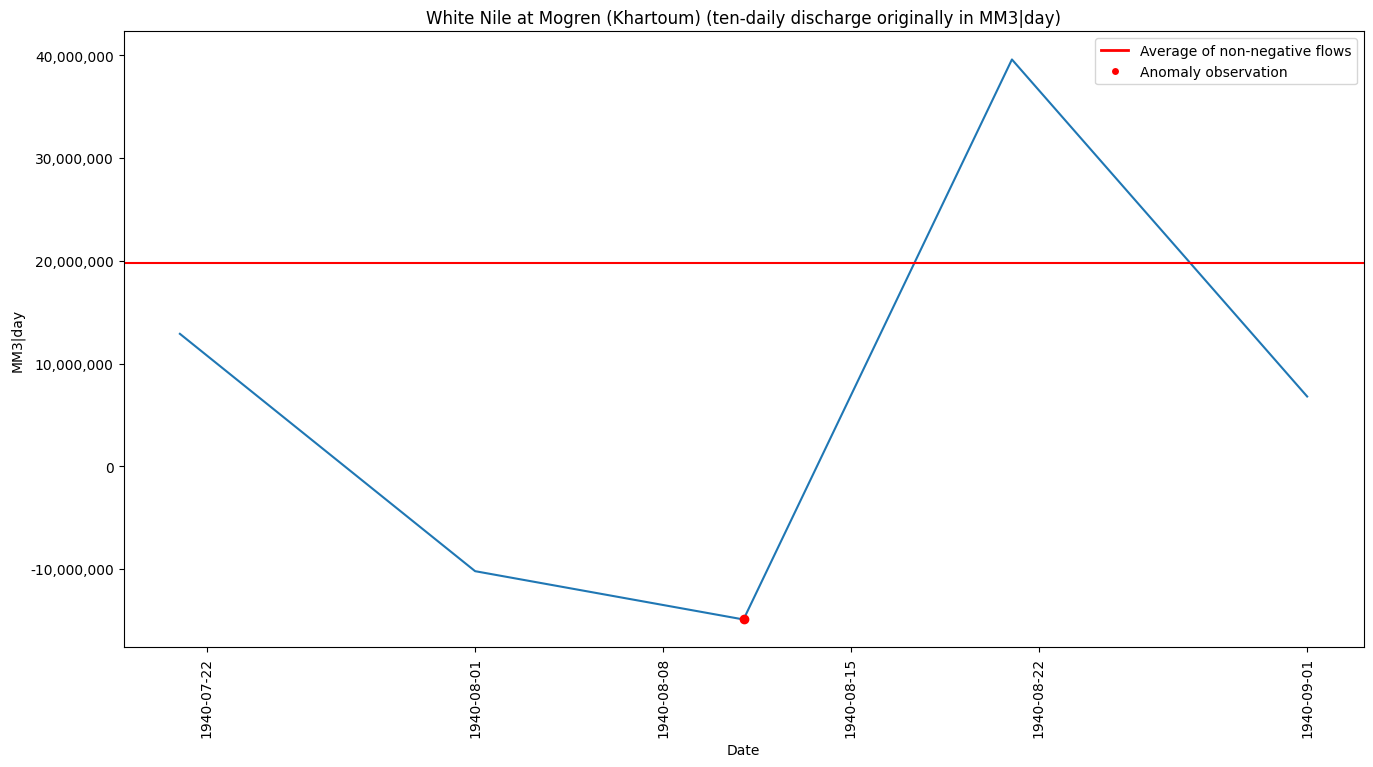

Plotting the observations of the same day as the anomaly:



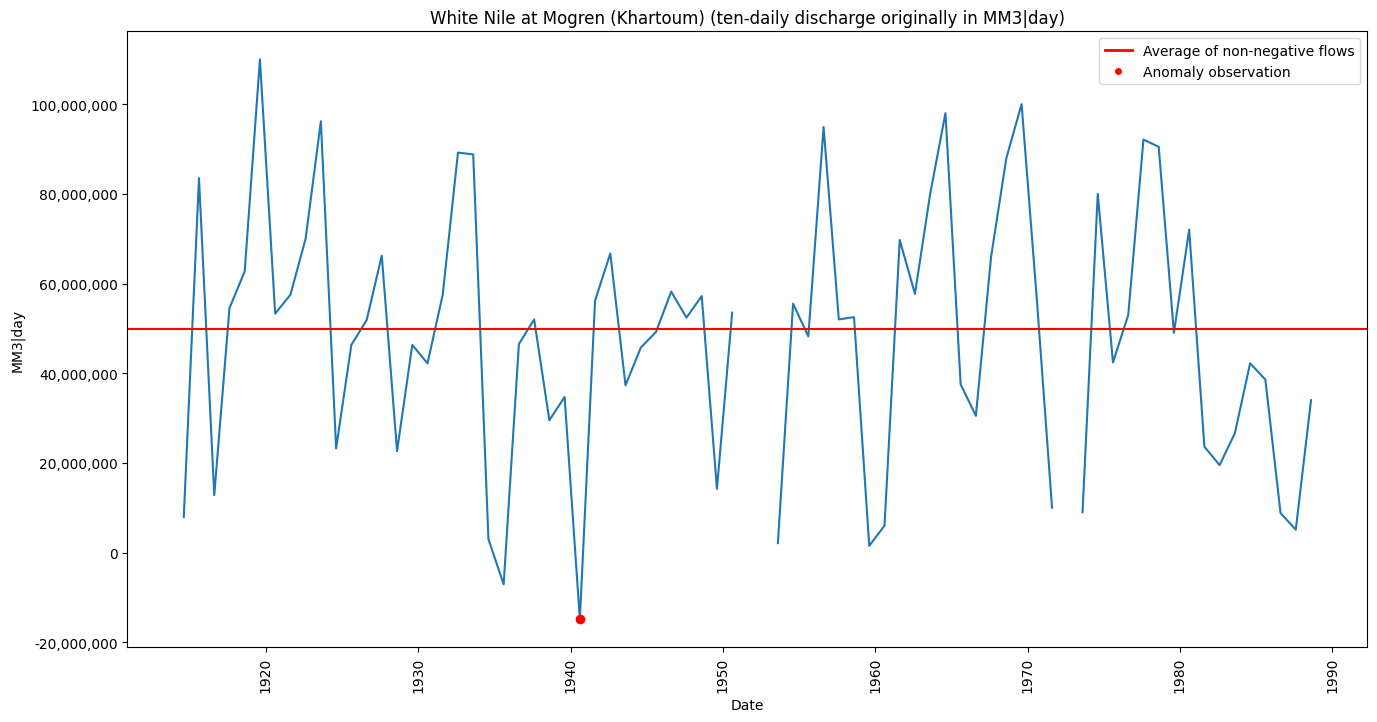

Plotting the two observations latest and immediately after the anomaly:



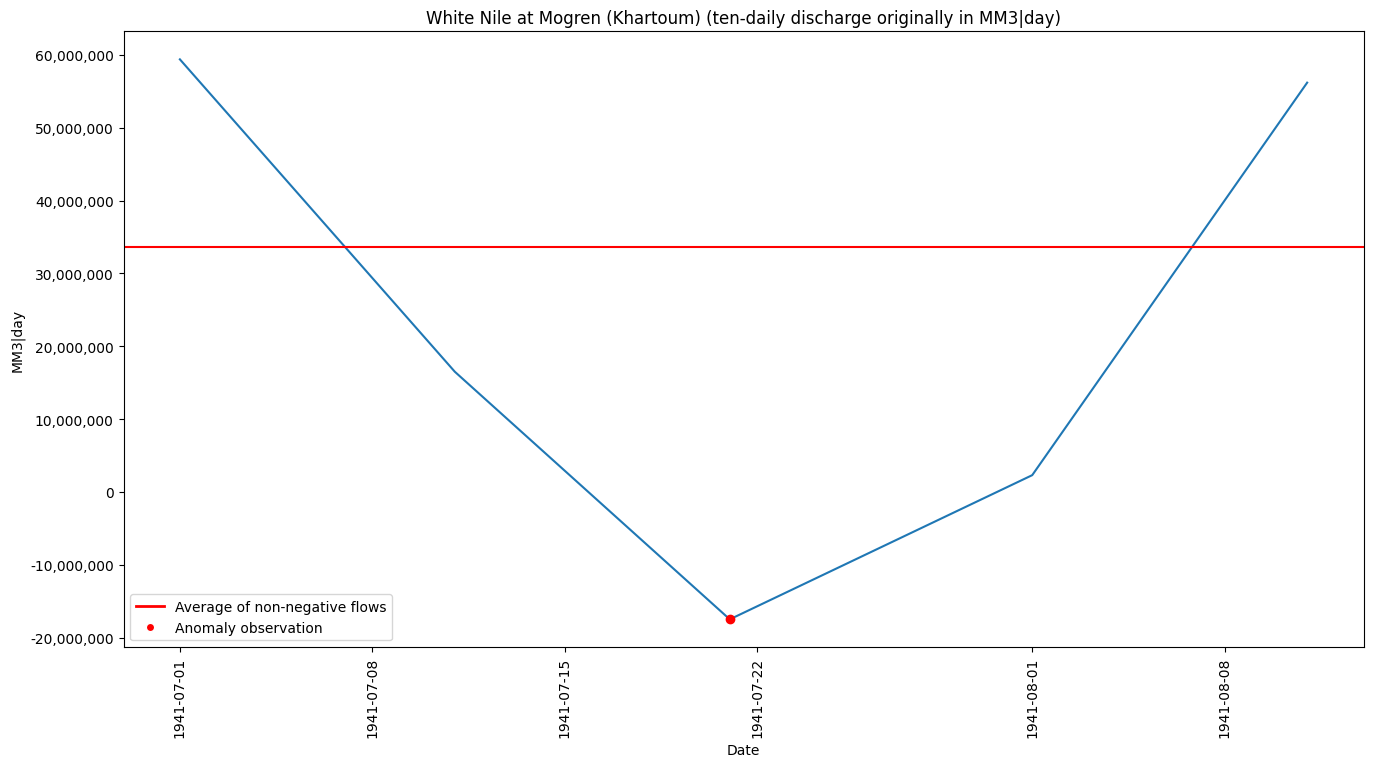

Plotting the observations of the same day as the anomaly:



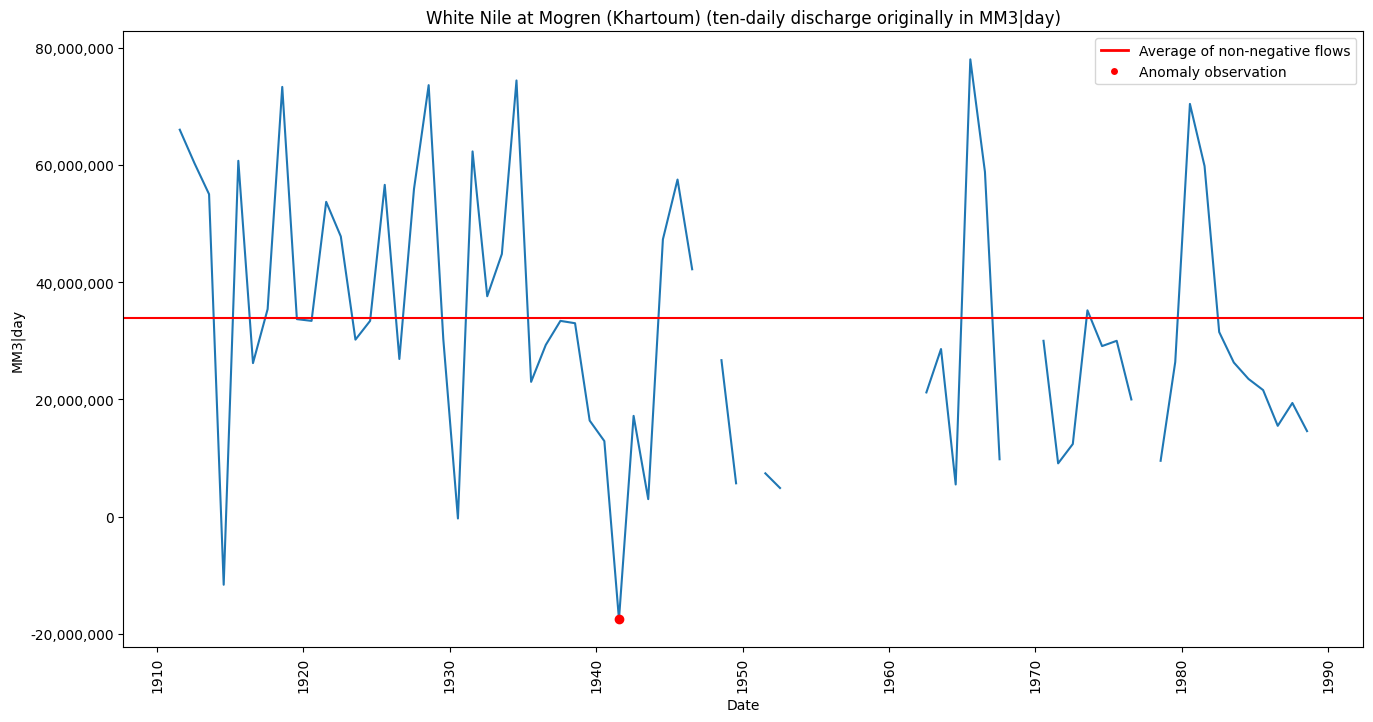

Plotting the two observations latest and immediately after the anomaly:



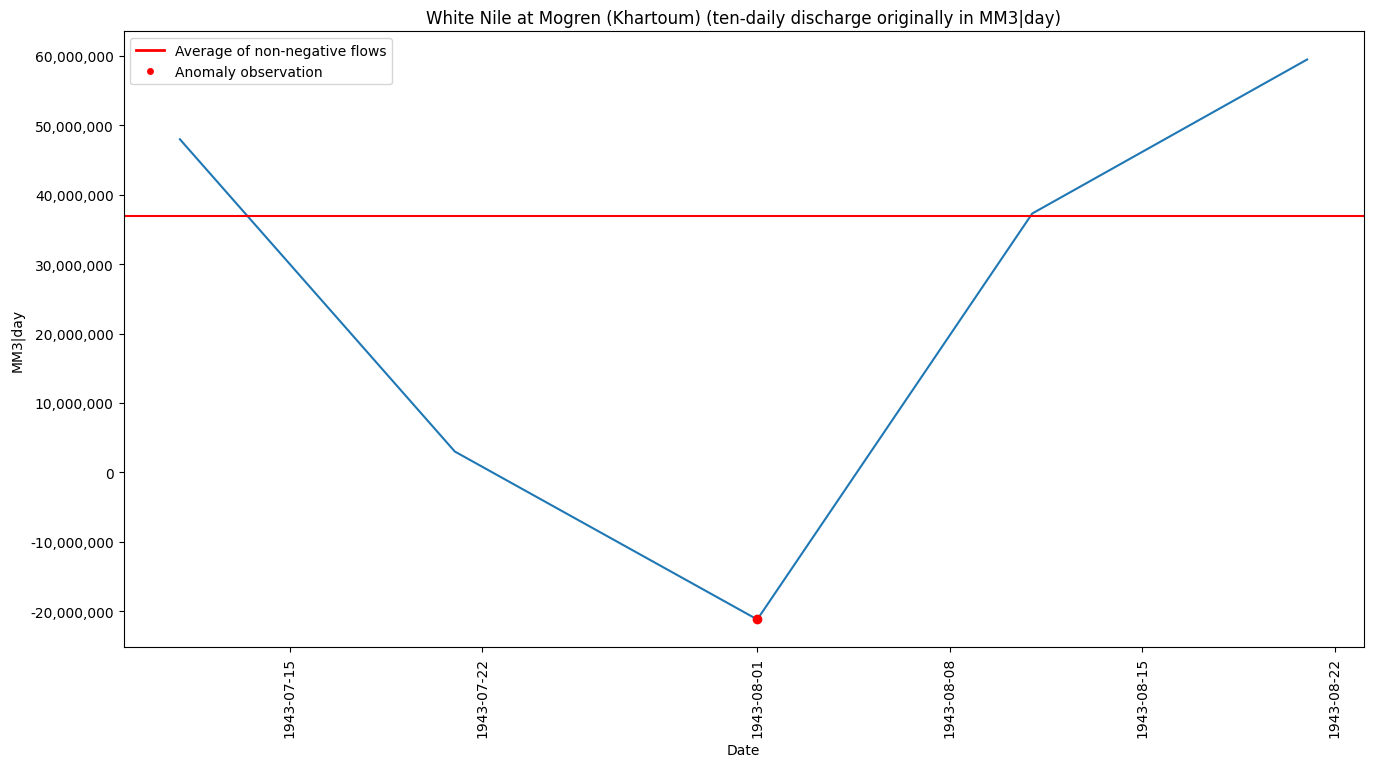

Plotting the observations of the same day as the anomaly:



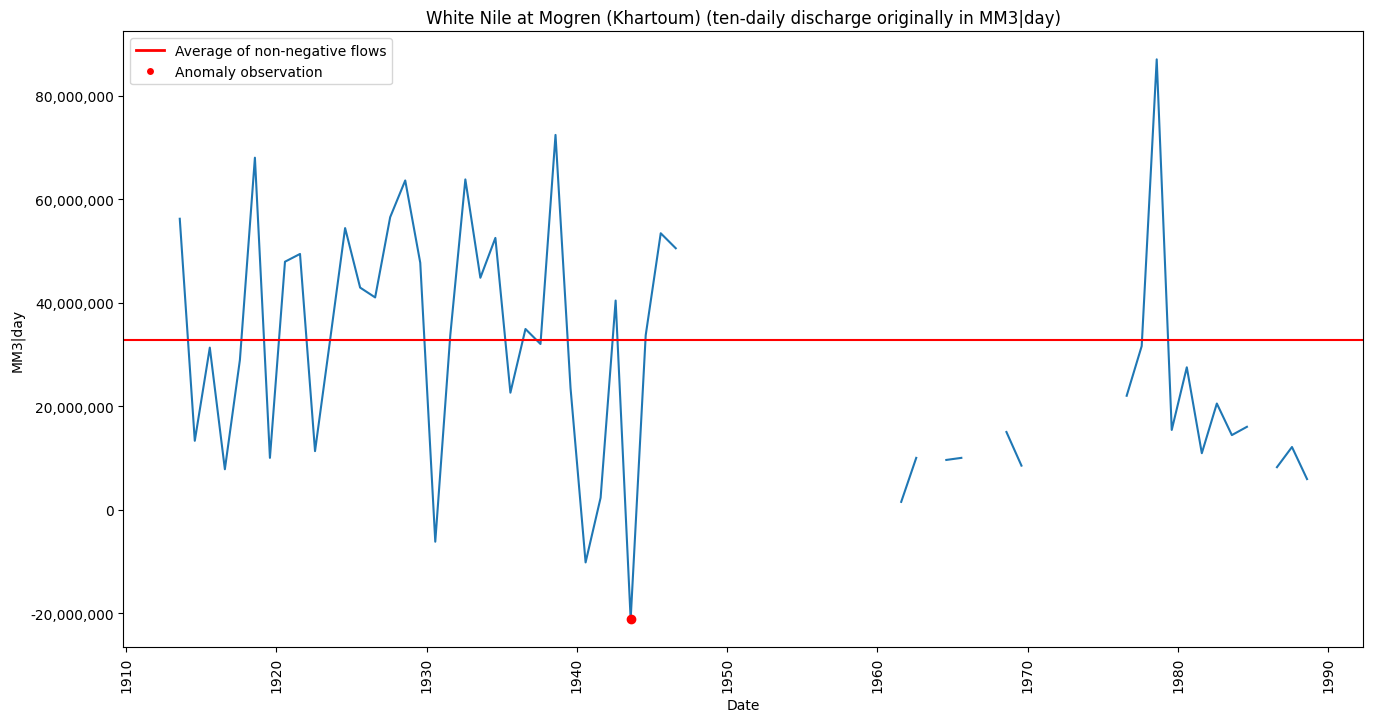

White Nile at Mogren (Khartoum) (ten-daily discharge originally in MM3|day)
Total rows: 2783, NaNs: 42 so 1.51 percent NaNs
-----
Atbara at Kilo 3 (Monthly Discharge originally in Mm3) - Observed.csv
-----
| Date   | Atbara at Kilo 3 (Monthly Discharge originally in Mm3) - Observed   |
|--------|---------------------------------------------------------------------|

Atbara at Kilo 3 (Monthly Discharge originally in Mm3) - Observed
Total rows: 959, NaNs: 355 so 37.02 percent NaNs
-----
Abay at Ethio-Sudan Border (Monthly Discharge originally in m3|s) - Infilled.csv
-----
| Date   | Abay at Ethio-Sudan Border (Monthly Discharge originally in m3|s) - Infilled   |
|--------|--------------------------------------------------------------------------------|

Abay at Ethio-Sudan Border (Monthly Discharge originally in m3|s) - Infilled
Total rows: 395, NaNs: 0 so 0.0 percent NaNs
-----
Rahad near its mouth into Blue Nile (at Abu Haraz) (ten-daily discharge originally in MM3|day).csv
-----
| Dat

In [3]:
directory = "../historical_hydrology/original_hydromet"
files_historical_series = [file for file in os.listdir(directory) if file[-4:] == ".csv"]

series_dict = dict()

for file in files_historical_series:
    
    print("-----")
    print(file)
    print("-----")
    
    # Type casting/correction:
    df = pd.read_csv(f"{directory}/{file}")
    streamflows = df.iloc[:, -1]
    df.iloc[:,-1] = pd.to_numeric(streamflows,errors="coerce") # Casting the streamflows to numeric
    date = df.iloc[:, 0]
    df.iloc[:, 0] = pd.to_datetime(date) # Correcting the data type of dates
    
    name = df.columns[-1]
    
    # Let's find out the negative values in each:
    negative_rows = df.loc[df[file[:-4]] < 0,:]
    
    print(negative_rows.to_markdown())
    print()
    
    # Seems that Mogren ten daily data set contains 8 negative values
    # Negative values don't make sense as a discharge, so I'll check the same periods of other
    # years to see if the absolute value of those values seem reasonable (if it is just an extra typing of dash)
    
    if len(negative_rows) > 0:

        for _, row in negative_rows.iterrows():
            
            two_back_two_front = df.loc[row.name - 2: row.name + 2]
            print("Plotting the two observations latest and immediately after the anomaly:\n")
            streamflow_plotter([two_back_two_front], row.name)
            
            my_month = row.Date.month
            my_day = row.Date.day
            
            all_years = df.loc[(df.Date.dt.month == my_month) & (df.Date.dt.day == my_day)]
            print("Plotting the observations of the same day as the anomaly:\n")
            streamflow_plotter([all_years], row.name)
            
        # Converting the negatives to positive seems like a sensible action, considering the seasonality
        # and the short-term trend
        
        df.loc[df[file[:-4]] < 0, name] *= -1
        
    # clear_output(wait=True)
    
    # Now let's focus on NaNs:
    only_nans = df.loc[df[name].isnull()]
    # print(only_nans.to_markdown())
    print(name)
    print(f"Total rows: {len(df)}, NaNs: {len(only_nans)} so {round(100*len(only_nans)/len(df), 2)} percent NaNs")
    
#     clear_output()
        
    series_dict[file] = df

Let's do the following comparisons:

- White Nile at Mogren VS. White Nile at DS Jebel Aulia
- Abay at Ethio-Sudan Border VS. Blue Nile at Deim
- Two different Atbara at Kilo 3
- Rahad vs Dinder

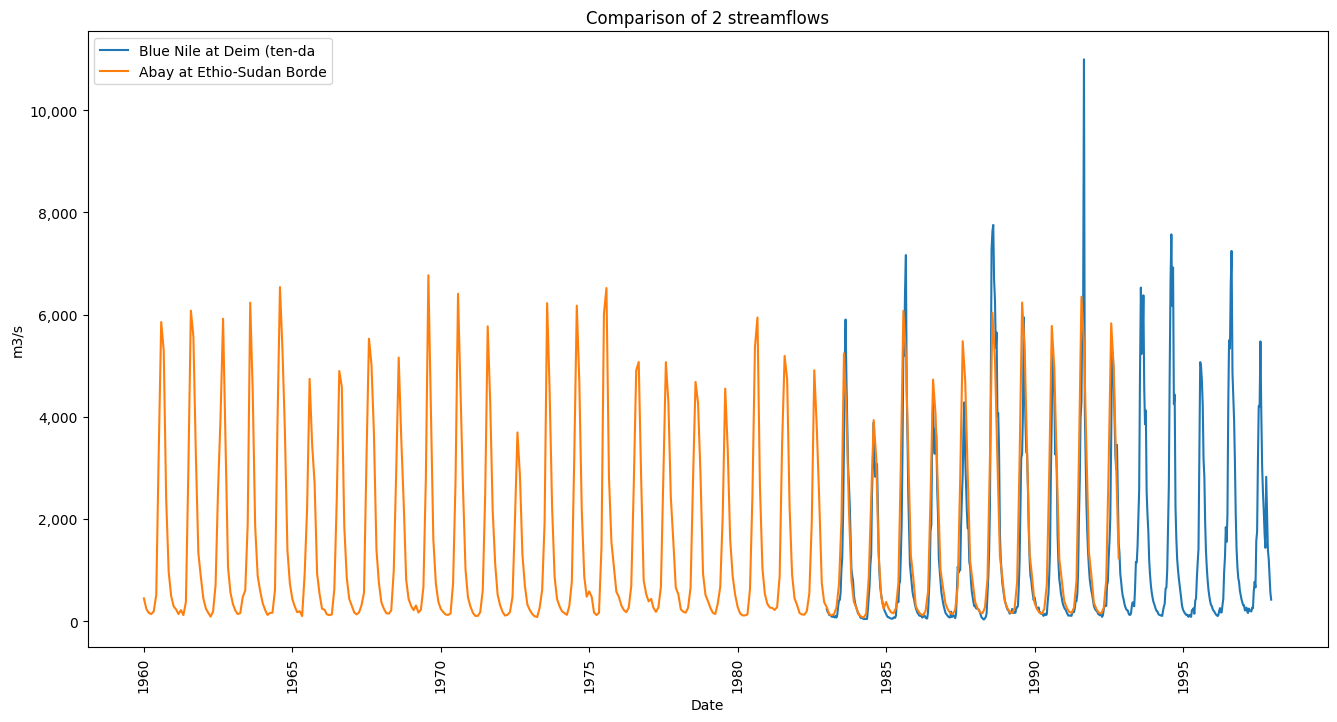

In [4]:
divisor_for_m3_per_s = 3600 * 24
df1 = series_dict['Blue Nile at Deim (ten-daily discharge originally in MM3|day).csv']
df2 = series_dict['Abay at Ethio-Sudan Border (Monthly Discharge originally in m3|s) - Infilled.csv']
df1.iloc[:,-1] /= divisor_for_m3_per_s
streamflow_plotter([df1, df2], unit="m3/s")

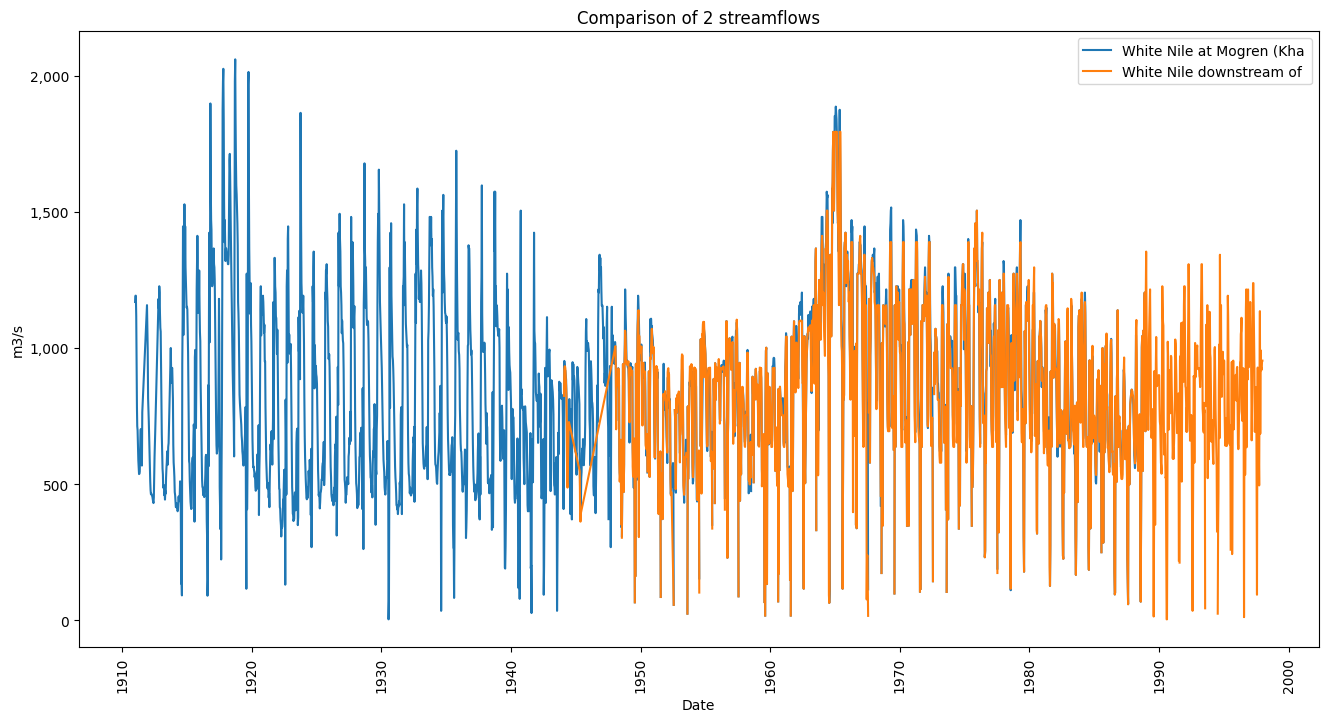

In [5]:
divisor_for_m3_per_s = 3600 * 24
df1 = series_dict['White Nile at Mogren (Khartoum) (ten-daily discharge originally in MM3|day).csv']
df2 = series_dict['White Nile downstream of Jebel Aulia Dam (ten-daily discharge originally in MM3|day).csv']
df1.iloc[:,-1] /= divisor_for_m3_per_s
df2.iloc[:,-1] /= divisor_for_m3_per_s
streamflow_plotter([df1, df2], unit="m3/s")

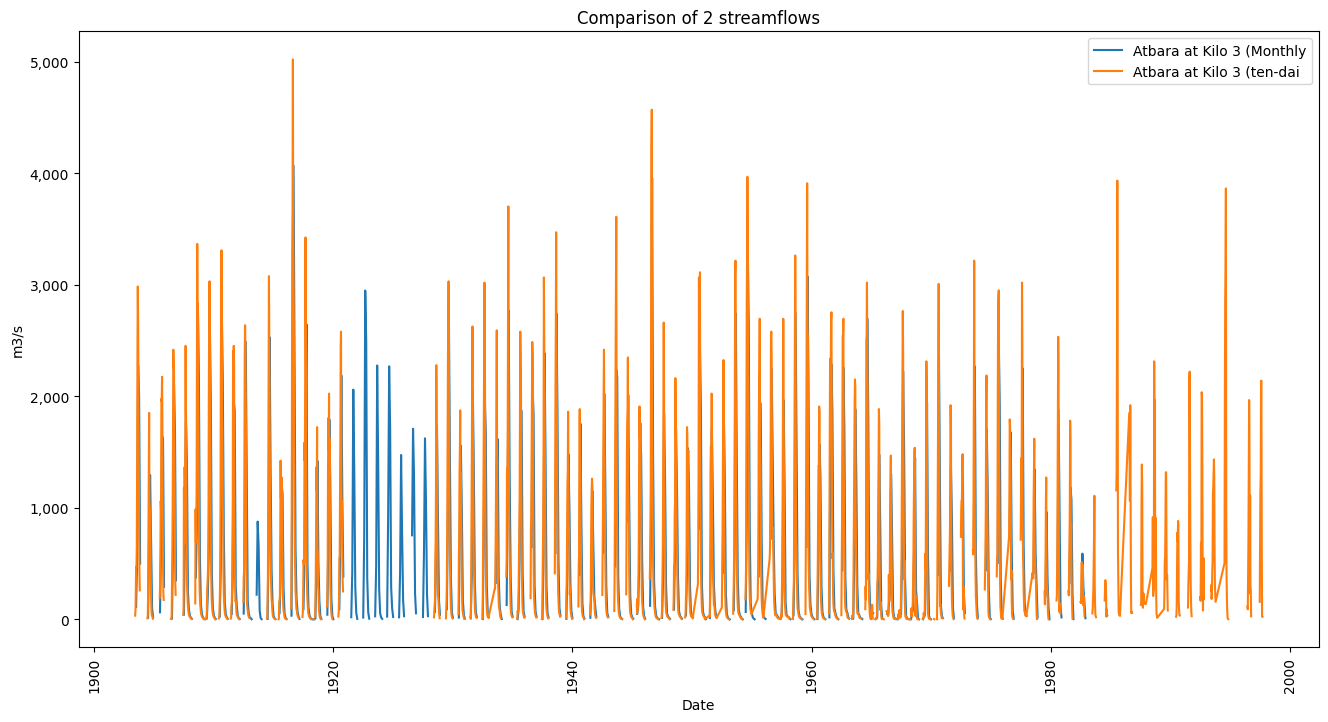

In [6]:
divisor_for_m3_per_s = 3600 * 24

df1 = series_dict['Atbara at Kilo 3 (Monthly Discharge originally in Mm3) - Observed.csv']
df2 = series_dict['Atbara at Kilo 3 (ten-daily discharge originally in MM3|day).csv']
df1.iloc[:,-1] /= (divisor_for_m3_per_s * 1e-6 * pd.Series(map(lambda x: x.days_in_month, df1.Date)))
df2.iloc[:,-1] /= divisor_for_m3_per_s
streamflow_plotter([df1, df2], unit="m3/s")

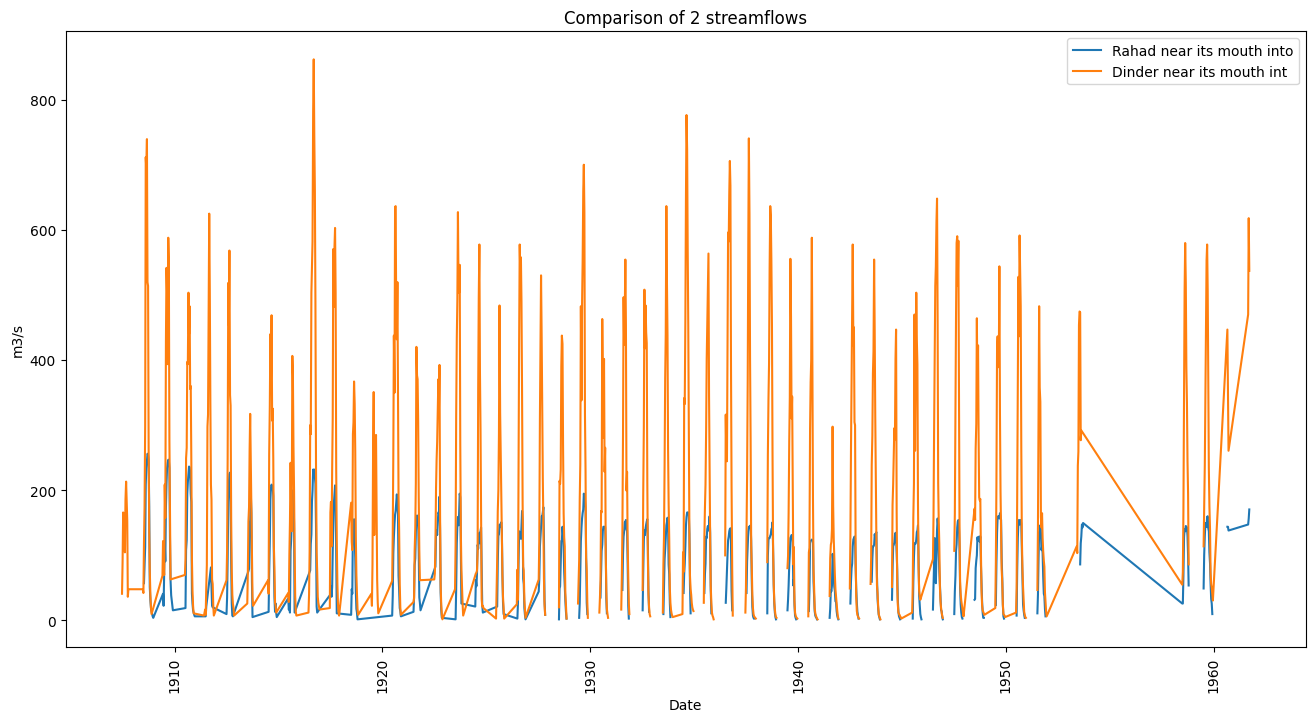

In [7]:
divisor_for_m3_per_s = 3600 * 24
df1 = series_dict['Rahad near its mouth into Blue Nile (at Abu Haraz) (ten-daily discharge originally in MM3|day).csv']
df2 = series_dict['Dinder near its mouth into Blue Nile (at Hillet ldreis) (ten-daily discharge originally in MM3|day).csv']
df1.iloc[:,-1] /= divisor_for_m3_per_s
df2.iloc[:,-1] /= divisor_for_m3_per_s
streamflow_plotter([df1, df2], unit="m3/s")

Streamflow values seem reasonable (also in comparison with nearby tributaries and gaging stations). NaN values in Atbara, Rahad and Dinder are likely to be zeros. White Nile flow is fairly stable, so we can fill the NaNs as the mean of the previous and next available data points. Blue Nile is already full. After one final visual inspection we will fill the NaNs. Before, it makes sense to convert all series to **monthly** and determine the range of dates we are going to keep. So:
- 01-1960 to 12-1997 for:
Blue Nile, White Nile and Atbara

- 01-1912 to 12-1950 for:
Rahad and Dinder

Some in-between dates don't exist in few of the files, implying zero flow months. Let's first do the monthly aggregation:

In [8]:
for key, streamflow in series_dict.items():
    series_dict[key] = streamflow.groupby([pd.Grouper(key="Date", freq="1M")]).mean()



In [9]:
blue_nile1 = series_dict['Abay at Ethio-Sudan Border (Monthly Discharge originally in m3|s) - Infilled.csv']
blue_nile2 = series_dict['Blue Nile at Deim (ten-daily discharge originally in MM3|day).csv'].loc["1992-12-31":]

blue_nile1.columns = ["BlueNile_m3|s"]
blue_nile2.columns = ["BlueNile_m3|s"]
final_blue_nile = pd.concat([blue_nile1, blue_nile2])

In [10]:
final_blue_nile

,BlueNile_m3|s
Date,
1960-01-31,445.700000
1960-02-29,236.800000
1960-03-31,161.600000
1960-04-30,137.400000
1960-05-31,190.300000
...,...
1997-08-31,4606.481481
1997-09-30,2565.586420
1997-10-31,1990.740741


In [11]:
white_nile1 = series_dict['White Nile at Mogren (Khartoum) (ten-daily discharge originally in MM3|day).csv']
white_nile1.columns = ["WhiteNile_m3|s"]
white_nile1.loc[white_nile1.isnull().values]

,WhiteNile_m3|s
Date,
1911-08-31,NaN
1911-09-30,NaN
1911-10-31,NaN
1911-11-30,NaN
1912-08-31,NaN
1912-09-30,NaN
1913-09-30,NaN


In [12]:
white_nile1.tail()

,WhiteNile_m3|s
Date,
1988-08-31,426.697519
1988-09-30,971.450600
1988-10-31,889.660517
1988-11-30,1141.975309
1988-12-31,952.160506


In [13]:
white_nile2 = series_dict['White Nile downstream of Jebel Aulia Dam (ten-daily discharge originally in MM3|day).csv']
white_nile2.columns = ["WhiteNile_m3|s"]
# white_nile2.loc[white_nile2.isnull().values]

In [14]:
white_nile2.tail()

,WhiteNile_m3|s
Date,
1997-08-31,739.583322
1997-09-30,583.719133
1997-10-31,907.021614
1997-11-30,945.987643
1997-12-31,942.515444


In [15]:
final_white_nile = pd.concat([white_nile1.loc["1960-01-31":], white_nile2.loc["1989-01-31":]])
final_white_nile

,WhiteNile_m3|s
Date,
1960-01-31,738.425932
1960-02-29,656.249994
1960-03-31,873.456767
1960-04-30,962.962957
1960-05-31,729.938260
...,...
1997-08-31,739.583322
1997-09-30,583.719133
1997-10-31,907.021614


In [16]:
atbara1 = series_dict['Atbara at Kilo 3 (Monthly Discharge originally in Mm3) - Observed.csv']
atbara1.columns = ["Atbara_m3|s"]
atbara2 = series_dict['Atbara at Kilo 3 (ten-daily discharge originally in MM3|day).csv']
atbara2.columns = ["Atbara_m3|s"]

In [17]:
atbara1

,Atbara_m3|s
Date,
1903-01-31,NaN
1903-02-28,NaN
1903-03-31,NaN
1903-04-30,NaN
1903-05-31,NaN
...,...
1982-07-31,151.209677
1982-08-31,589.904421
1982-09-30,288.194444


In [18]:
final_atbara = pd.concat([atbara1.loc["1960-01-31":], atbara2.loc["1982-12-31":]])
final_atbara = final_atbara.fillna(value=0)

We need to add the last three months to Atbara (0 flow in 1997 October, November, December)

In [19]:
appendix = pd.DataFrame({"Date": ["1997-10-31", "1997-11-30", "1997-12-31"],
                         "Atbara_m3|s": [0, 0, 0]})
appendix.Date = pd.to_datetime(appendix.Date)
appendix = appendix.set_index("Date")
appendix

,Atbara_m3|s
Date,
1997-10-31,0
1997-11-30,0
1997-12-31,0


In [20]:
final_atbara = pd.concat([final_atbara, appendix])
final_atbara

,Atbara_m3|s
Date,
1960-01-31,22.102748
1960-02-29,9.578544
1960-03-31,1.978793
1960-04-30,0.000000
1960-05-31,0.000000
...,...
1997-08-31,1859.567901
1997-09-30,251.929015
1997-10-31,0.000000


In [21]:
rahad = series_dict['Rahad near its mouth into Blue Nile (at Abu Haraz) (ten-daily discharge originally in MM3|day).csv'].loc["1912-01-31": "1950-12-31"]
rahad.columns = ["Rahad_m3|s"]
rahad = rahad.fillna(value=0)
rahad

,Rahad_m3|s
Date,
1912-01-31,0.000000
1912-02-29,0.000000
1912-03-31,0.000000
1912-04-30,0.000000
1912-05-31,0.000000
...,...
1950-08-31,142.746914
1950-09-30,150.848767
1950-10-31,103.780865


In [22]:
dinder = series_dict['Dinder near its mouth into Blue Nile (at Hillet ldreis) (ten-daily discharge originally in MM3|day).csv'].loc["1912-01-31": "1950-12-31"]
dinder.columns = ["Dinder_m3|s"]
dinder = dinder.fillna(value=0)
dinder

,Dinder_m3|s
Date,
1912-01-31,0.000000
1912-02-29,0.000000
1912-03-31,0.000000
1912-04-30,0.000000
1912-05-31,0.000000
...,...
1950-08-31,444.830244
1950-09-30,537.422837
1950-10-31,157.021602


BlueNile_m3|s


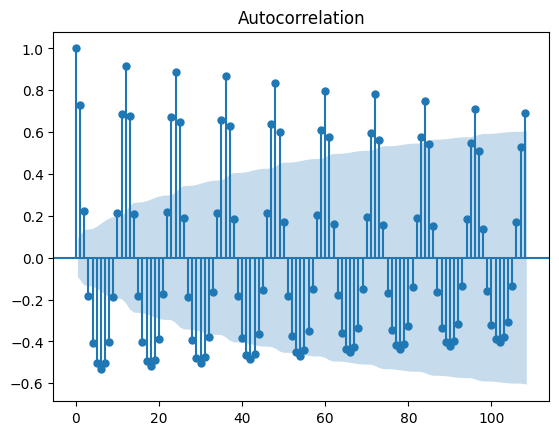

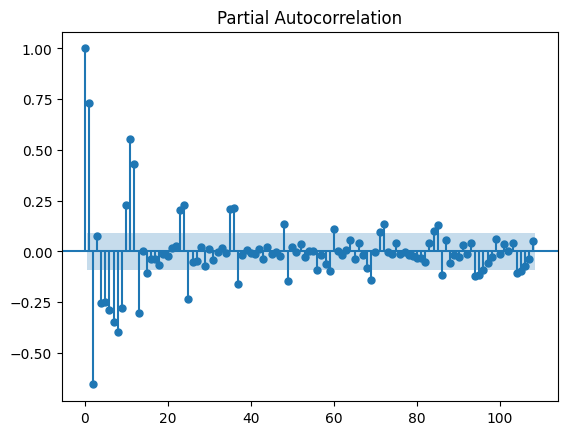

WhiteNile_m3|s


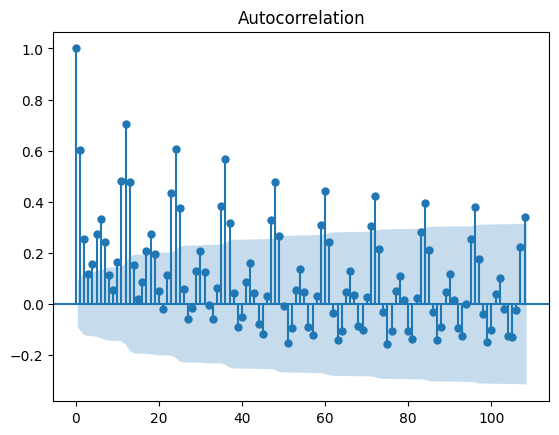

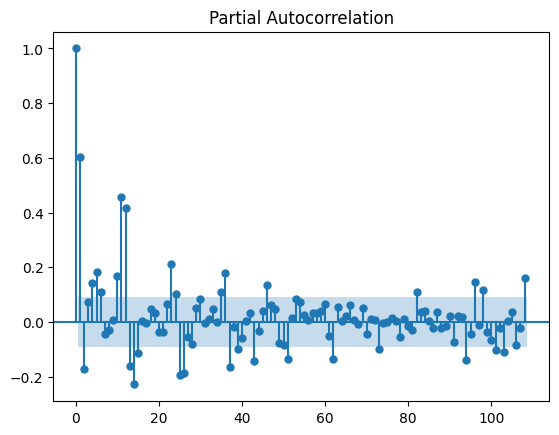

Atbara_m3|s


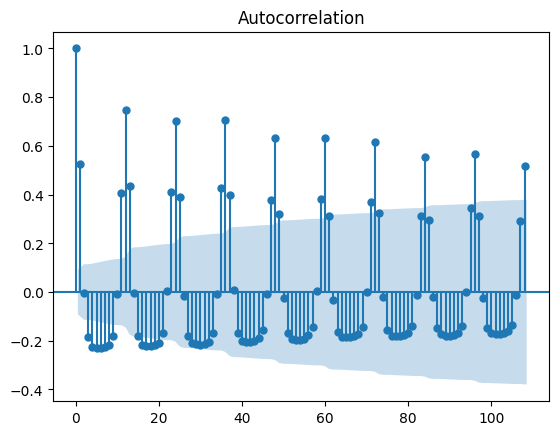

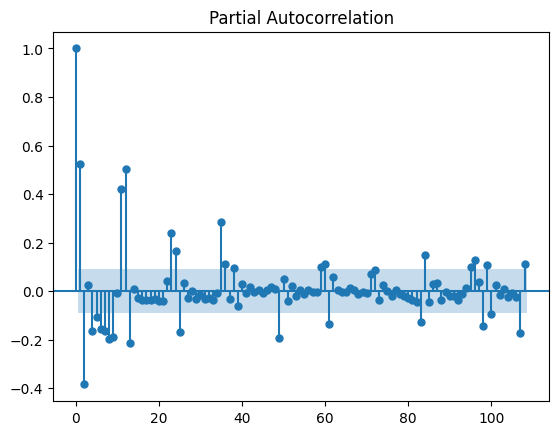

Rahad_m3|s


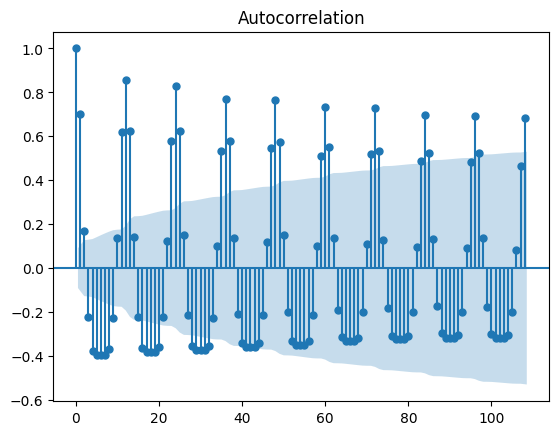

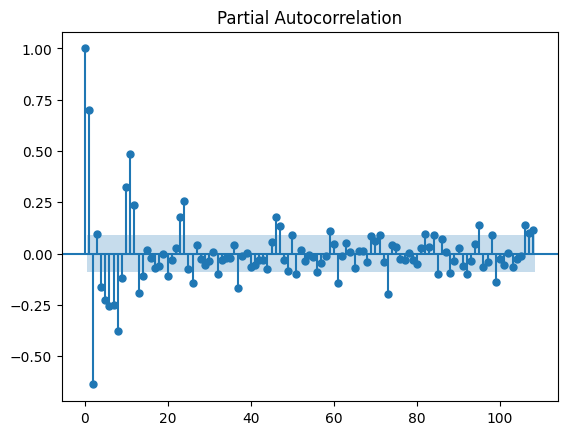

Dinder_m3|s


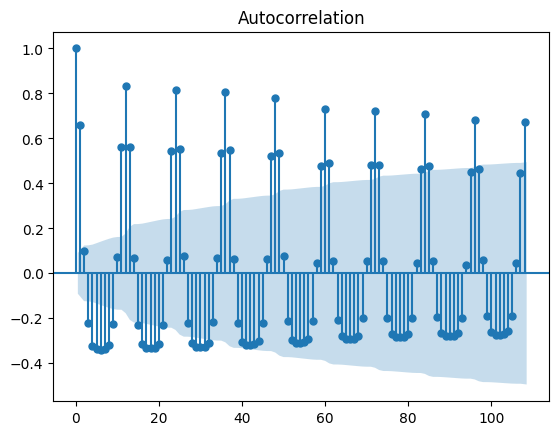

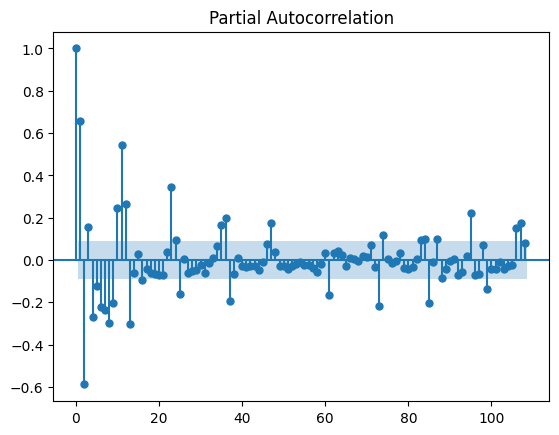

In [23]:
catchment_flows = [final_blue_nile, final_white_nile, final_atbara, rahad, dinder]

for df in catchment_flows:
    
    name = df.columns[-1]
    print(name)
    plot_acf(df[name], lags=108)
    plot_pacf(df[name], lags=108)
    plt.show()
    

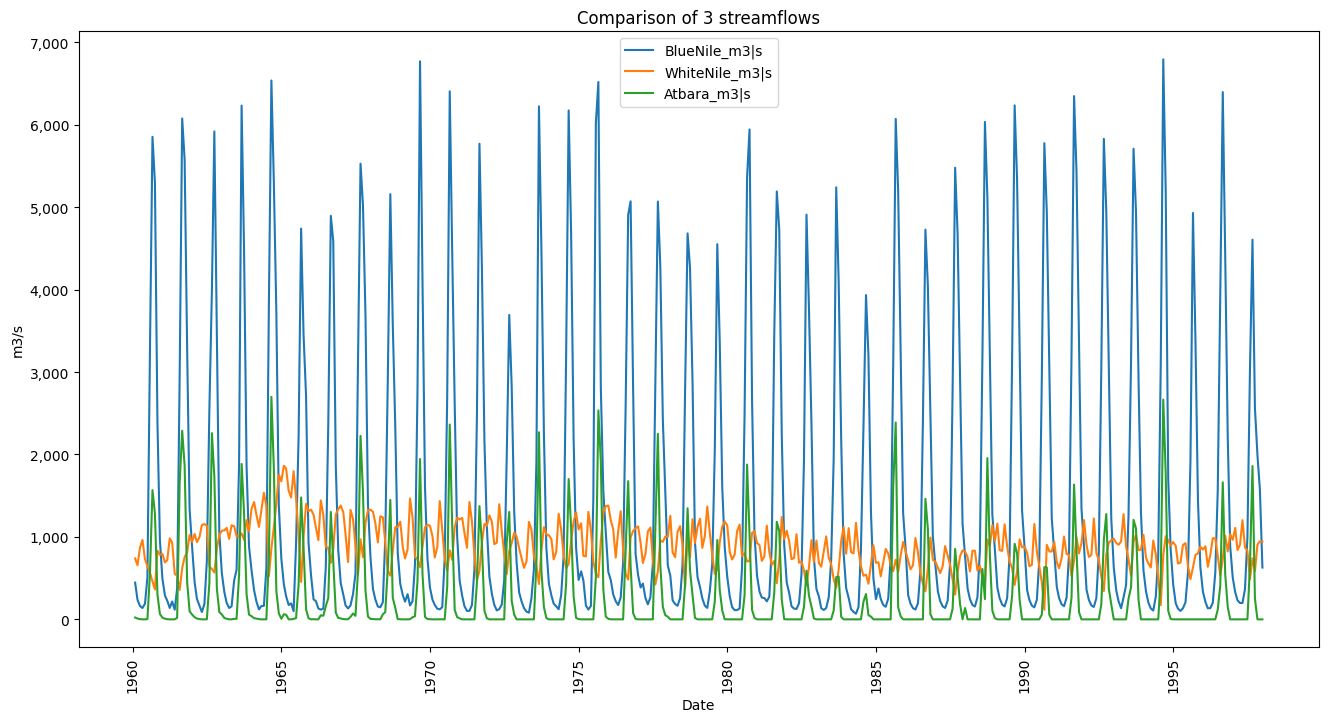

In [24]:
streamflow_plotter([final_blue_nile.reset_index(), final_white_nile.reset_index(), final_atbara.reset_index()], unit="m3/s")

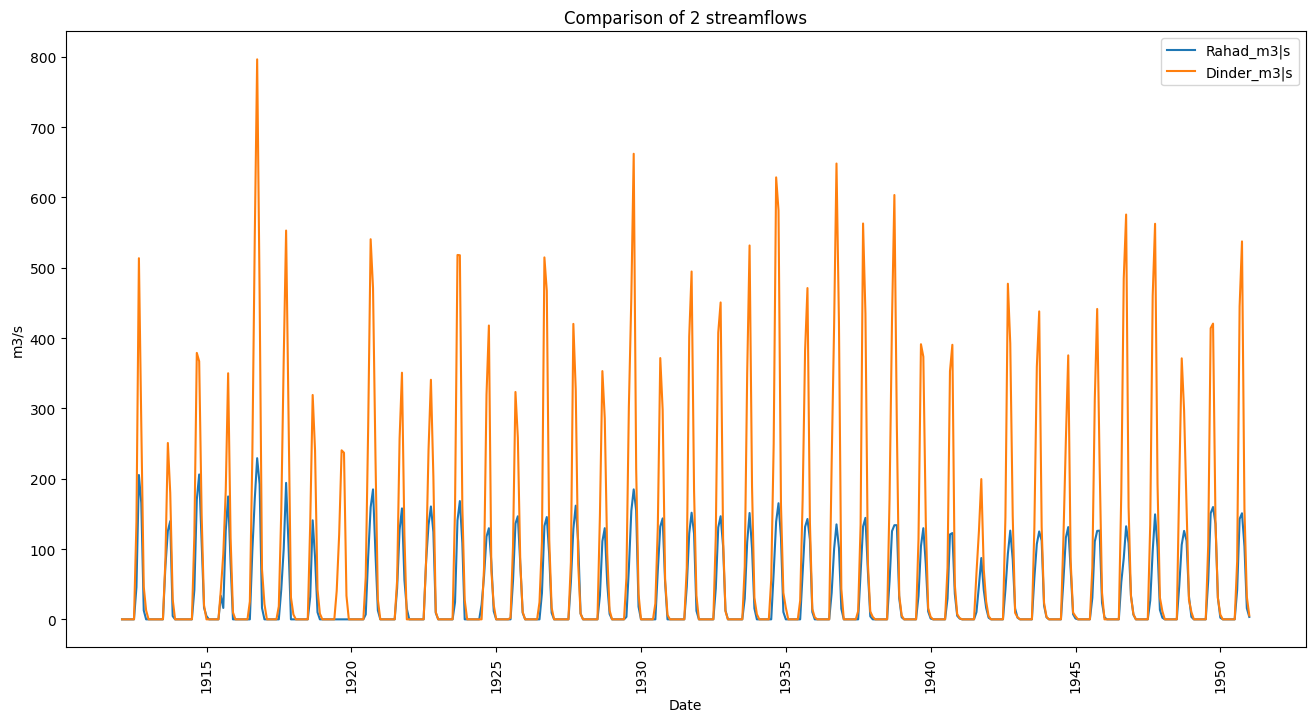

In [25]:
streamflow_plotter([rahad.reset_index(), dinder.reset_index()], unit="m3/s")

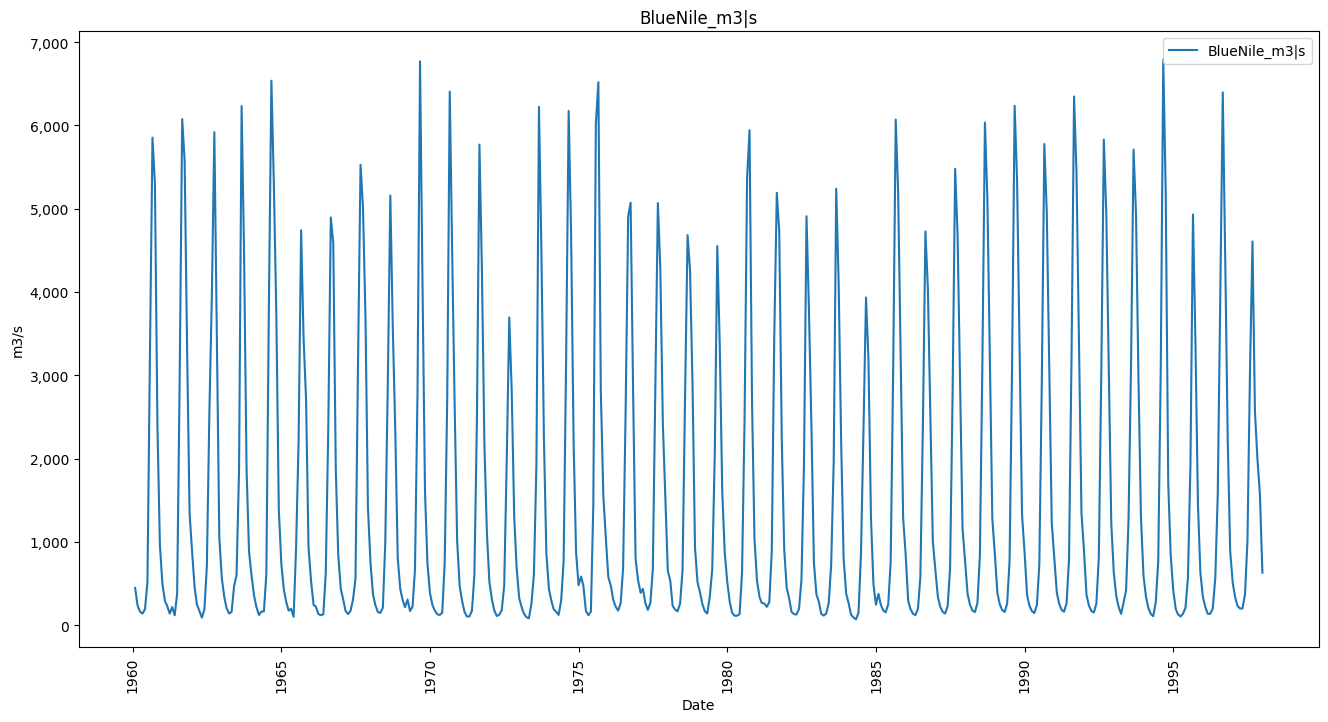

In [26]:
streamflow_plotter([final_blue_nile.reset_index()], unit="m3/s")

Let's do some analysis on the streamflows to identify drought periods:

In [27]:
def divide_df(df, avgs, stds):
    
    flow = df.columns[-1]
    for i, row in df.iterrows():
        if stds[i.month -1] != 0:
            df.loc[i, flow] = (df.loc[i, flow] - avgs[i.month -1]) / stds[i.month -1]
        else:
            df.loc[i, flow] = 0
        
    return df

def lognormalize_streamflows(streamflow_df):
    
    flow_name = streamflow_df.columns[-1]
    copy_df = streamflow_df.copy()
    
    # take logarithm
    problem_indices = copy_df[flow_name] < 1

    copy_df.loc[problem_indices,flow_name] = 1

    still_problem =copy_df.loc[copy_df[flow_name] < 1]
    print(still_problem.to_markdown())
    copy_df[flow_name] = pd.Series(np.log(copy_df[flow_name]))
    monthly_averages = []
    monthly_std = []
    
    for i in range(1,13):
        month_obs = copy_df.loc[copy_df.index.month == i, flow_name]
        monthly_averages.append(np.mean(month_obs))
        monthly_std.append(np.std(month_obs))
    
    return divide_df(copy_df, monthly_averages, monthly_std)
        
    

In [28]:
def findDroughts(streamflow_df):
    
    flow_name = streamflow_df.columns[-1]
    dates = pd.Series(streamflow_df.index)
    normalized_log_streamflow = np.array(lognormalize_streamflows(streamflow_df)[flow_name])
    total_observations = len(normalized_log_streamflow)
    # first calculate the moving averages of 6 observations:

    numbers_series = pd.Series(normalized_log_streamflow)
    windows = numbers_series.rolling(6)
    moving_averages = windows.mean()
    # first 5 months will be NaN due to our window being 6, replace them with 0:
    moving_averages_list = moving_averages.fillna(0).tolist()

    # Now that we have the moving averages, let's apply the drought criterion:
    drought_period_indices = []

    for i in range(6, total_observations):
        section_of_six = moving_averages_list[i-6:i]
        if all(map(lambda x: x<0, section_of_six)) and any(map(lambda x: x<-1, section_of_six)):
            drought_period_indices.append(i)

    plt.plot(dates, moving_averages_list, color='black')
    plt.vlines(x = [dates[x] for x in drought_period_indices], ymin=-2,
             ymax = 2, colors = 'red')
    plt.xlabel('Date',fontsize=14)
    plt.ylabel('SSI$_6$', fontsize=14)
    plt.title(f"Drought investigation SSI6 criterion {flow_name}", fontsize=14)
    #plt.xticks(rotation='vertical', fontsize=18)
    plt.yticks(fontsize=14)
    plt.show()
    
    drought_groups = list()
    already_grouped = list()
    
    for i, dr_index in enumerate(drought_period_indices):
        if dr_index in already_grouped:
            continue
        current_group = [dr_index]
        j = i
        while (drought_period_indices[j+1] - drought_period_indices[j] == 1):
            current_group.append(drought_period_indices[j+1])
            already_grouped.append(drought_period_indices[j+1])
            j += 1
            if j == len(drought_period_indices) - 1:
                break
            
        drought_groups.append(current_group)
        
    drought_count = len(drought_groups)
    drought_magnitudes = list(map(lambda x: sum([moving_averages_list[i] for i in x]), drought_groups))
    avg_magnitude = np.mean(drought_magnitudes)
    drought_lengths = list(map(lambda x: len(x), drought_groups))
    avg_duration = np.mean(drought_lengths)
    
    print(drought_groups)
            
    return drought_count, avg_magnitude, avg_duration
            

| Date   | BlueNile_m3|s   |
|--------|-----------------|


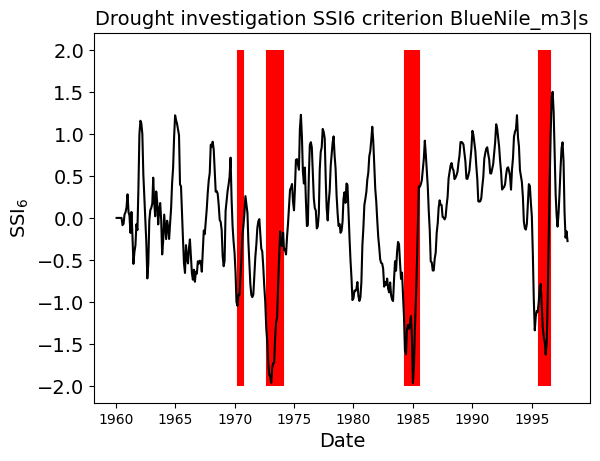

[[123, 124, 125, 126, 127, 128], [152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168], [291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305], [426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437]]


(4, -13.17306216095515, 12.5)

In [29]:
findDroughts(final_blue_nile)

| Date   | BlueNile_m3|s   |
|--------|-----------------|


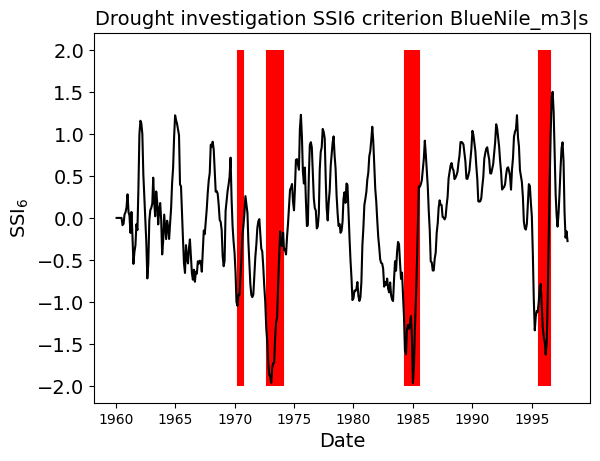

[[123, 124, 125, 126, 127, 128], [152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168], [291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305], [426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437]]
| Date   | WhiteNile_m3|s   |
|--------|------------------|


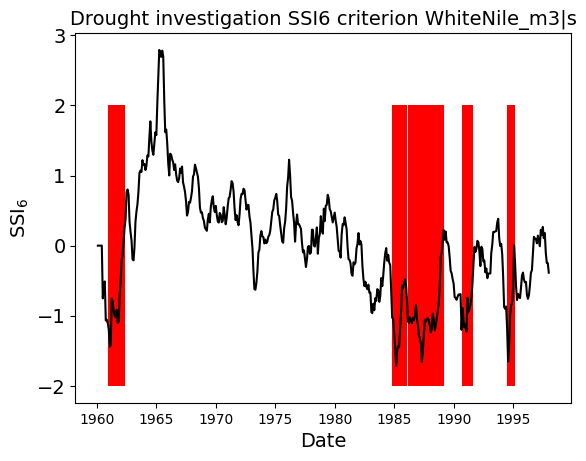

[[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], [298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311], [314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348], [368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378], [414, 415, 416, 417, 418, 419, 420]]
| Date   | Atbara_m3|s   |
|--------|---------------|


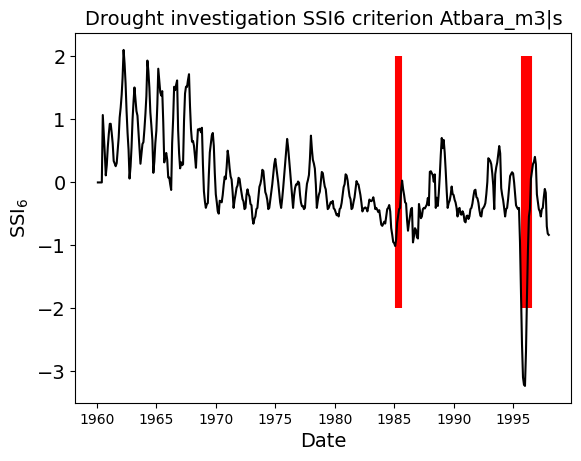

[[301, 302, 303, 304, 305, 306], [428, 429, 430, 431, 432, 433, 434, 435, 436, 437]]
| Date   | Rahad_m3|s   |
|--------|--------------|


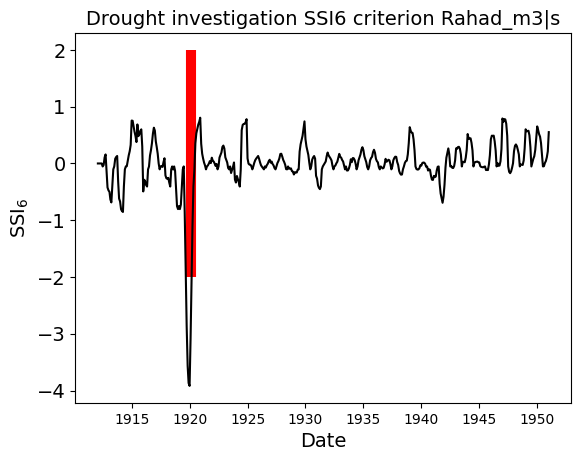

[[92, 93, 94, 95, 96, 97, 98, 99, 100, 101]]
| Date   | Dinder_m3|s   |
|--------|---------------|


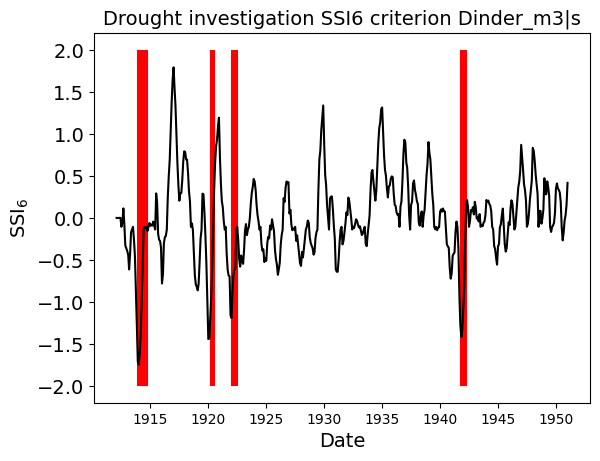

[[22, 23, 24, 25, 26, 27, 28, 29, 30, 31], [98, 99, 100, 101], [119, 120, 121, 122, 123, 124, 125], [357, 358, 359, 360, 361, 362]]


In [30]:
catchment_flows = [final_blue_nile, final_white_nile, final_atbara, rahad, dinder]

for flow in catchment_flows:
    findDroughts(flow)

One last trick before generating synthetic hydrology is to replace zero flows with an infinitesimally small number. Otherwise, we have a problem in Cholesky decomposition of correlation matrices.

In [31]:
for flow in catchment_flows:
    flow=flow.mask(flow==0).fillna(1e-6)
    flow.to_csv(f"../historical_hydrology/{flow.columns[-1].split('_')[0]}.csv")

One last analysis to see the total water volume in each year. Separately done for the two group again (one with 3 main tributaries, one with Rahad and Dinder):

In [32]:
sec_in_day = 24 * 3600
total_bcms = dict()

for flow in catchment_flows:
    name = flow.columns[-1]
    copy_flow = flow.copy()
    
    copy_flow["total_BCM"] = monthrange(row["Date"].year, row["Date"].month)[1] * sec_in_day * copy_flow[name] * 1e-9
    copy_flow = copy_flow.reset_index().groupby([pd.Grouper(key="Date", freq="1Y")]).sum()
    
    total_bcms[name] = copy_flow
    

In [33]:
np.mean(total_bcms['BlueNile_m3|s'].total_BCM + total_bcms['Atbara_m3|s'].total_BCM + total_bcms['WhiteNile_m3|s'].total_BCM)

87.3347932802356

In [34]:
np.mean(total_bcms['Rahad_m3|s'].total_BCM + total_bcms['Dinder_m3|s'].total_BCM)

4.153589318978457

In [39]:
december_averages = []
for flow in catchment_flows:
    december_averages.append(flow.loc[flow.index.month == 12].iloc[:,-1].mean())
    
sum(december_averages)
    

1632.7586259983175